In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler,QuantileTransformer

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

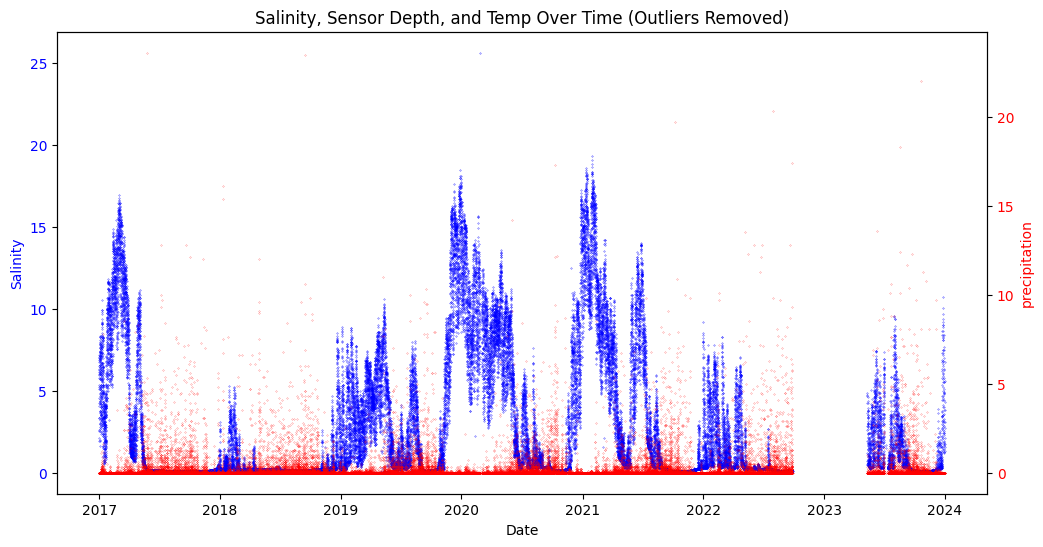

In [18]:
# Load the data
csv_file2 = 'ladpo_normalized.csv' # Path to the CSV file
df2 = pd.read_csv(csv_file2)

# Convert date_time to datetime format and set as the index
df2['date_time'] = pd.to_datetime(df2['date_time'], format='%Y-%m-%d %H:%M:%S')
df2.set_index('date_time', inplace=True)

# Filter for columns 'Salinity' and 'precipitation' and remove rows with NaN values
df2 = df2.loc[: , ['Salinity', 'precipitation']].dropna()

# Remove outliers in Sensor_Depth (e.g., values below -10, assuming they're erroneous)
df2 = df2[(df2['Salinity'] > 0) & (df2['Salinity'] < 50)]

# Plot both columns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Salinity data
ax1.plot(df2.index, df2['Salinity'], '.', markersize=0.5, label='Salinity', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Salinity', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the scaled Sensor_Depth
ax2 = ax1.twinx()
ax2.plot(df2.index, df2['precipitation'], '.', markersize=0.3, label='Precipitation', color='r')
ax2.set_ylabel('precipitation', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and show plot
plt.title('Salinity, Sensor Depth, and Temp Over Time (Outliers Removed)')
plt.show()

In [19]:
df = df2.loc['2019-01-01':'2022-09-01', ['Salinity']] # Filter for the date range

# Define column indices dictionary for df
column_indices = {name: i for i, name in enumerate(df.columns)}

# Split data into training, validation, and test sets
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

# Define number of features based on df1's columns
num_features = df.shape[1]

In [20]:
# Create a copy of the original data before any transformation
train_original = train_df.copy()
val_original = val_df.copy()
test_original = test_df.copy()

# Convert original and transformed data to DataFrames for plotting
columns = ['Salinity']
train_df = pd.DataFrame(train_df, columns=columns)
val_df = pd.DataFrame(val_df, columns=columns)
test_df = pd.DataFrame(test_df, columns=columns)

# Normalizing

In [21]:
# Initialize scalers
robust_scaler = RobustScaler()
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)

# Apply RobustScaler to train, validation, and test sets
train_df = robust_scaler.fit_transform(train_df)
val_df = robust_scaler.transform(val_df)
test_df = robust_scaler.transform(test_df)

# # Ensure there are no negative values before applying log transformation
# train_df = np.clip(train_df, a_min=0, a_max=None)
# val_df = np.clip(val_df, a_min=0, a_max=None)
# test_df = np.clip(test_df, a_min=0, a_max=None)

# Apply QuantileTransformer for normalizing the distribution
train_df = quantile_transformer.fit_transform(train_df)
val_df = quantile_transformer.transform(val_df)
test_df = quantile_transformer.transform(test_df)

# Convert back to DataFrame
columns = ['Salinity']
train_df = pd.DataFrame(train_df, columns=columns)
val_df = pd.DataFrame(val_df, columns=columns)
test_df = pd.DataFrame(test_df, columns=columns)

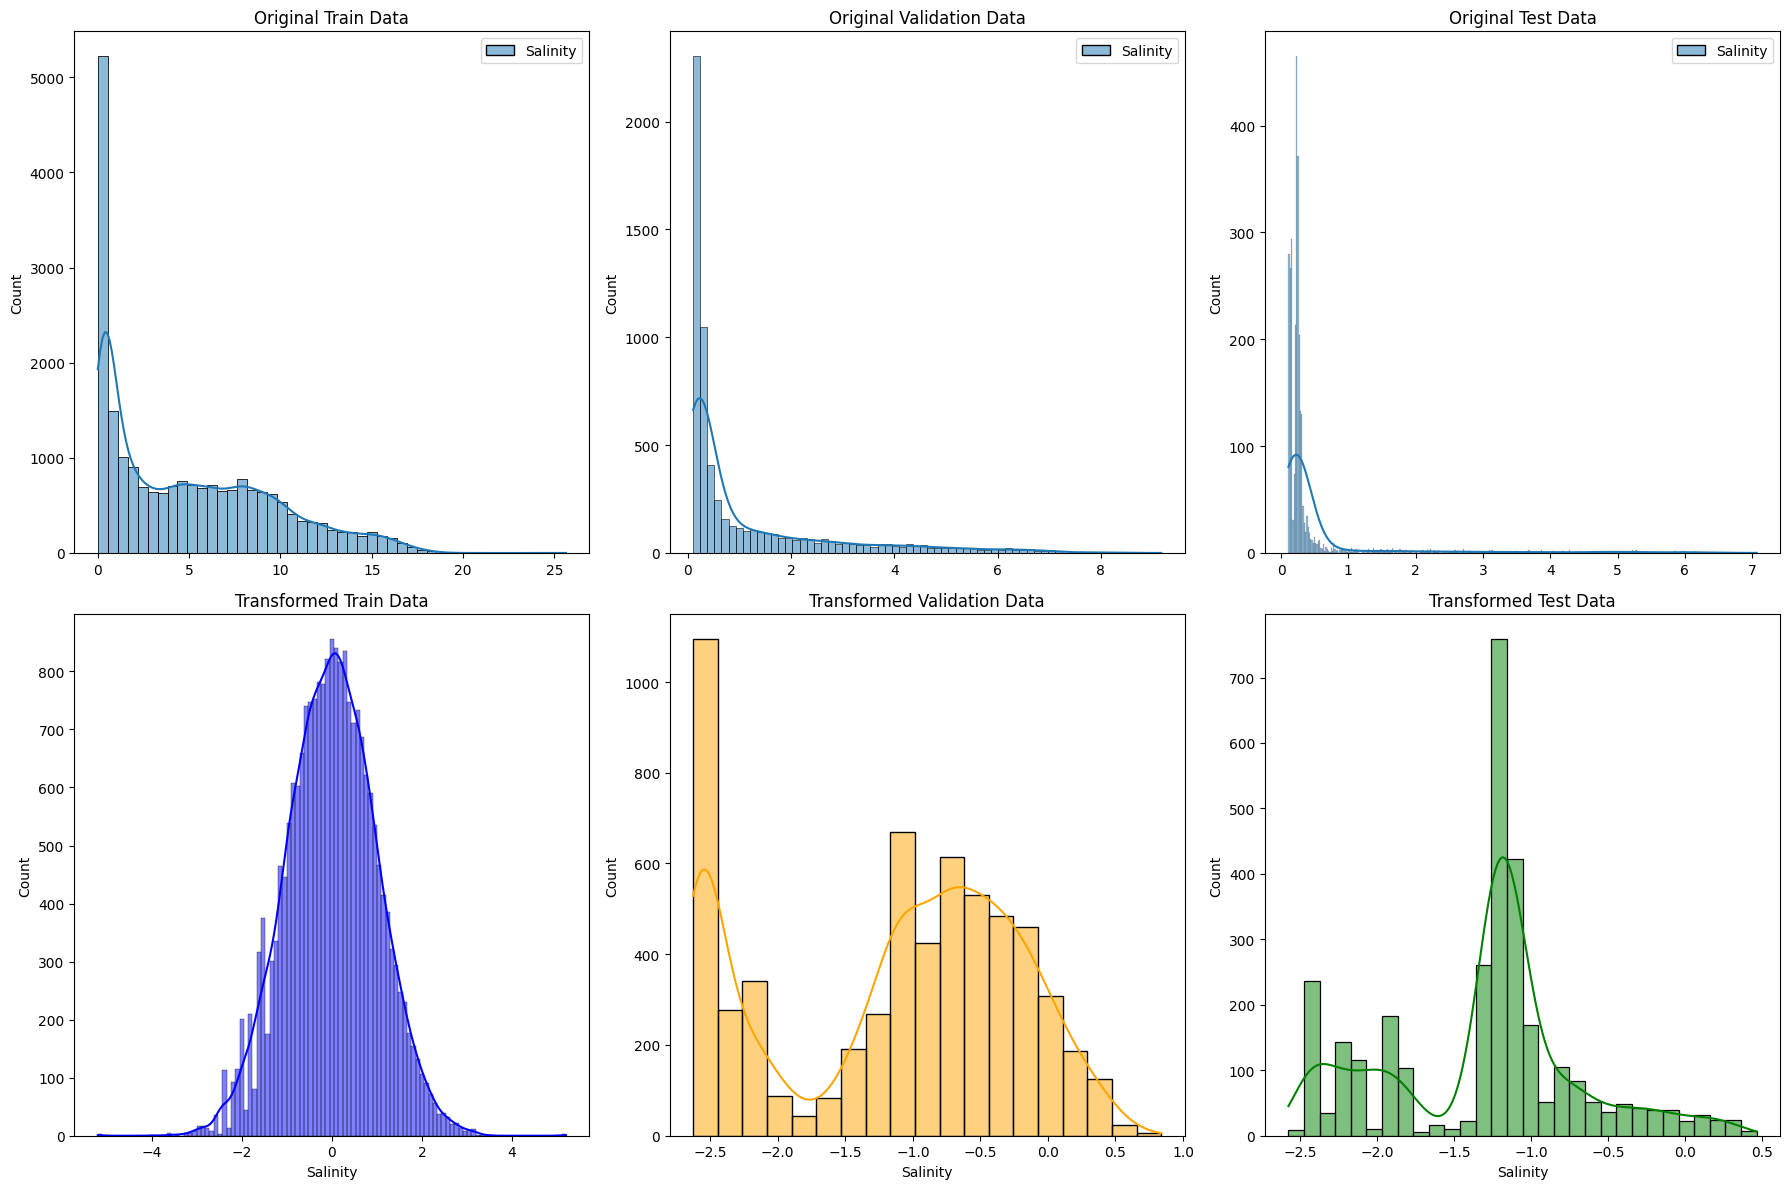

In [22]:
# Plotting the distributions before and after transformation
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original Data Histograms
sns.histplot(train_original, ax=axes[0, 0], kde=True, color='blue').set_title('Original Train Data')
sns.histplot(val_original, ax=axes[0, 1], kde=True, color='orange').set_title('Original Validation Data')
sns.histplot(test_original, ax=axes[0, 2], kde=True, color='green').set_title('Original Test Data')

# Transformed Data Histograms
sns.histplot(train_df['Salinity'], ax=axes[1, 0], kde=True, color='blue').set_title('Transformed Train Data')
sns.histplot(val_df['Salinity'], ax=axes[1, 1], kde=True, color='orange').set_title('Transformed Validation Data')
sns.histplot(test_df['Salinity'], ax=axes[1, 2], kde=True, color='green').set_title('Transformed Test Data')

# Adjust layout
plt.tight_layout()
plt.show()

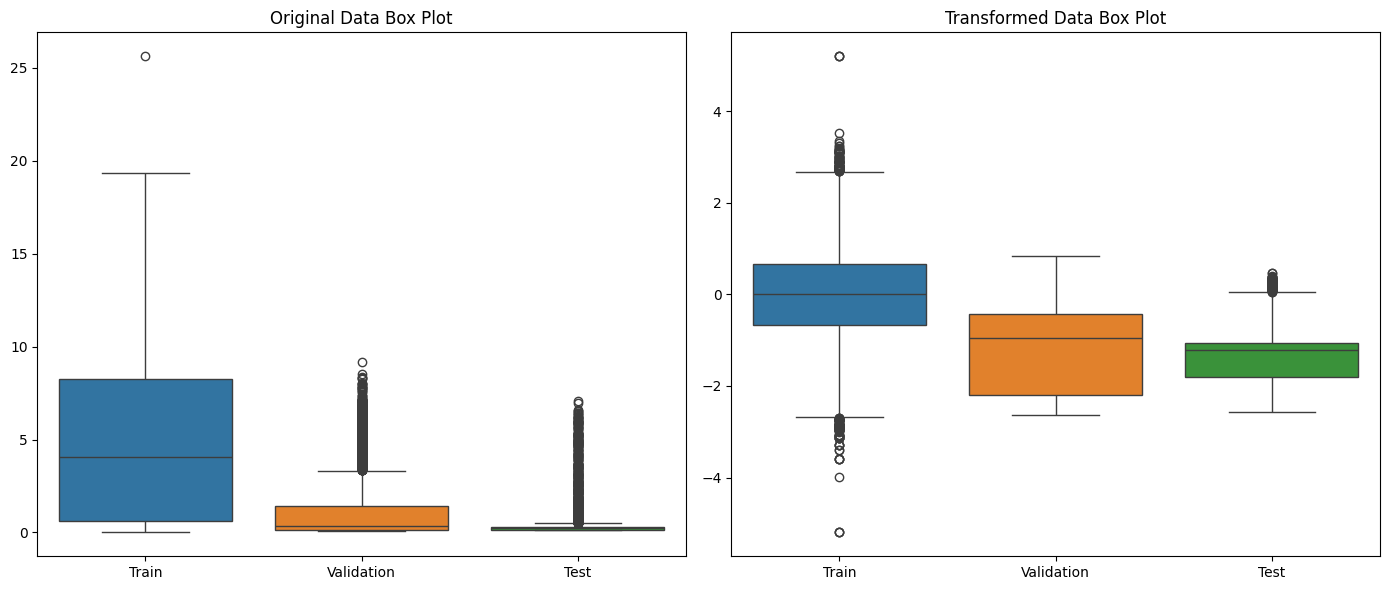

In [23]:
# Convert DataFrame to NumPy array and flatten
train_original_flat = train_original.values.flatten()
val_original_flat = val_original.values.flatten()
test_original_flat = test_original.values.flatten()

train_transformed_flat = train_df['Salinity'].values.flatten()
val_transformed_flat = val_df['Salinity'].values.flatten()
test_transformed_flat = test_df['Salinity'].values.flatten()

# Plotting Box Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Data Box Plot
sns.boxplot(data=[train_original_flat, val_original_flat, test_original_flat], ax=axes[0])
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['Train', 'Validation', 'Test'])
axes[0].set_title('Original Data Box Plot')

# Transformed Data Box Plot
sns.boxplot(data=[train_transformed_flat, val_transformed_flat, test_transformed_flat], ax=axes[1])
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['Train', 'Validation', 'Test'])
axes[1].set_title('Transformed Data Box Plot')

plt.tight_layout()
plt.show()

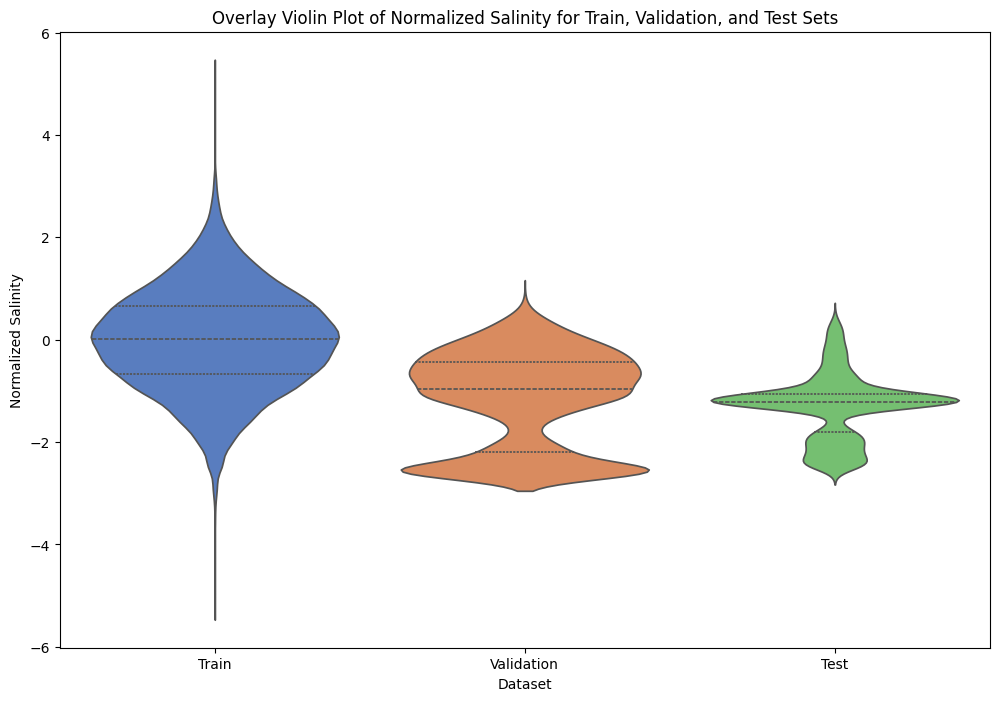

In [24]:
# Assuming you have your data as Pandas DataFrames
af_train_df_graph = pd.DataFrame(train_df, columns=['Salinity'])
af_val_df_graph = pd.DataFrame(val_df, columns=['Salinity'])
af_test_df_graph = pd.DataFrame(test_df, columns=['Salinity'])
# train_df, val_df, and test_df should already be normalized

# Combine the data into a single DataFrame for visualization
af_train_df_graph['Dataset'] = 'Train'
af_val_df_graph['Dataset'] = 'Validation'
af_test_df_graph['Dataset'] = 'Test'

# Stack the data for plotting
combined_af_df = pd.concat([af_train_df_graph, af_val_df_graph, af_test_df_graph])

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=combined_af_df, x='Dataset', y='Salinity', hue='Dataset', inner='quartile', palette='muted', legend=False)

# Add title and labels
plt.title("Overlay Violin Plot of Normalized Salinity for Train, Validation, and Test Sets")
plt.xlabel("Dataset")
plt.ylabel("Normalized Salinity")

# Display the plot
plt.show()